In [5]:
#EJERCICIO 1
# cargar librerias-----------------------------------------------
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import os
import tarfile
import urllib.request
import pandas as pd
# definir las rutas y caminos donde se encuentran los datos------
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# path que se va a crear en nuestro sistema----------------------
HOUSING_PATH = os.path.join("datasets", "housing")
# lugar de descarga del dataset----------------------------------
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# definir una funcion que obtenga los datos y los descargue-----
def fetch_housing_data(housing_url=HOUSING_URL, 
housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()
# definir una funcion que cargue el csv en un dataframe----------
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
# recordatorio variables numericas-------------------------------
housing.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.head()     

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
#definir variable respuesta
y = housing["median_house_value"].values.reshape(-1,1)

# Ajuste con longitude
# extraer variable y convertir en np.array-----------------------
x = housing["longitude"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
      % r2_score(y, y_pred))
#definir variable respuesta
y = housing["median_house_value"].values.reshape(-1,1)

# Ajuste con latitude
# extraer variable y convertir en np.array-----------------------
x = housing["latitude"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
      % r2_score(y, y_pred))
#definir variable respuesta
y = housing["median_house_value"].values.reshape(-1,1)

# Ajuste con housing_median_age  
# extraer variable y convertir en np.array-----------------------
x = housing["housing_median_age"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
      % r2_score(y, y_pred))
#definir variable respuesta
y = housing["median_house_value"].values.reshape(-1,1)

# Ajuste con total_rooms  
# extraer variable y convertir en np.array-----------------------
x = housing["total_rooms"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
      % r2_score(y, y_pred))
#definir variable respuesta
housing_2 = housing.dropna(axis=0, how='any')
y = housing_2["median_house_value"].values.reshape(-1,1)

# Ajuste con total_bedrooms  
# extraer variable y convertir en np.array-----------------------
x = housing_2["total_bedrooms"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
      % r2_score(y, y_pred))
#definir variable respuesta
y = housing["median_house_value"].values.reshape(-1,1)

# Ajuste con population  
# extraer variable y convertir en np.array-----------------------
x = housing["population"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
      % r2_score(y, y_pred))
#definir variable respuesta
y = housing["median_house_value"].values.reshape(-1,1)

# Ajuste con households  
# extraer variable y convertir en np.array-----------------------
x = housing["households"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
      % r2_score(y, y_pred))
#definir variable respuesta
y = housing["median_house_value"].values.reshape(-1,1)

# Ajuste con median_income  
# extraer variable y convertir en np.array-----------------------
x = housing["median_income"].values.reshape(-1,1)
# x.shape
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, y)
y_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
      % r2_score(y, y_pred)) 

Coeficiente de det. R2: 0.0021
Coeficiente de det. R2: 0.0208
Coeficiente de det. R2: 0.0112
Coeficiente de det. R2: 0.0180
Coeficiente de det. R2: 0.0025
Coeficiente de det. R2: 0.0006
Coeficiente de det. R2: 0.0043
Coeficiente de det. R2: 0.4734


Beta1:  [[41793.8492019]]
Beta0:  [45085.57670327]


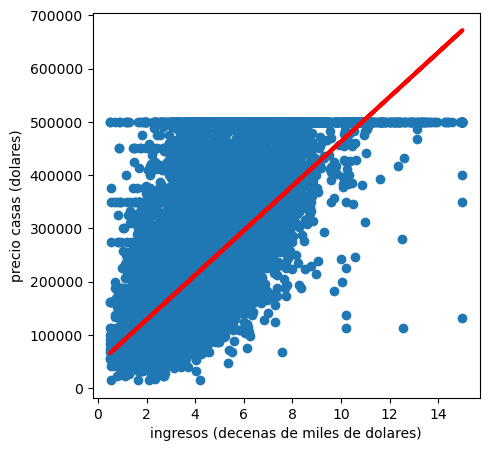

[7.0113115e+09]
[7.01199096e+09]
[3.50565575e+09]


In [11]:
#EJERCICIO 2
# se pueden obtener los coeficientes-----------------------------
print("Beta1: ", lm1.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print("Beta0: ", lm1.intercept_)
# obtener valores modelo-----------------------------------------
# pintar x e y---------------------------------------------------
fig = plt.figure(figsize=(5,5))
plt.scatter(x, y)
# pintar recta de regresion--------------------------------------
y_pred = lm1.predict(x)
plt.plot(x, y_pred, color='red', linewidth=3)
# definir ejes---------------------------------------------------
plt.xlabel("ingresos (decenas de miles de dolares)")
plt.ylabel("precio casas (dolares)")
# mostrar grafico------------------------------------------------
plt.show()
# calcular sigma2------------------------------------------------
y_resta = (y - y_pred) ** 2
print(sum(y_resta)/len(y))
# estimador de la varianza por OLS-------------------------------
print(sum(y_resta)/(len(y)-2))
sd = (sum(y_resta)/len(y))**1/2
print(sd)
#OJO: comprobar siempre si se trabaja con la sd o con la quasi-sd

In [12]:
#EJERCICIO 3
# calcular ICbeta1-----------------------------------------------
# calcular numerador sb1^2
s2 = sum(y_resta)/(len(y)-2)
# calcular denominador sb1^2
den = np.var(x) * len(x)
# calcular sb1
sb1 = (s2/den) ** 0.5
amplitud = 1.96 * sb1
print("El IC al 0.95 de b1 es:", lm1.coef_, "+/-", amplitud)
x_nueva = 33.7
y_nueva = lm1.intercept_ + lm1.coef_ * x_nueva
print("y nueva = %.2f" % y_nueva)
# comprobacion
x_array = np.array(x_nueva)
y_predicha = lm1.predict(x_array.reshape(1, -1))
print("y predicha = %.2f" % y_predicha)

print(y_nueva-y_predicha)

El IC al 0.95 de b1 es: [[41793.8492019]] +/- [601.33927762]
y nueva = 1453538.29
y predicha = 1453538.29
[[0.]]


C:\Users\Jvanfran\AppData\Local\Temp\ipykernel_26340\2916931504.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
C:\Users\Jvanfran\AppData\Local\Temp\ipykernel_26340\2916931504.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
